In [69]:
import pandas as pd
import numpy as np
import os 
import math

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import seaborn as sns 

In [70]:
plot_params = {
    'font.family': 'Ubuntu',
    'font.weight': 'light',
    
    'figure.figsize': (5,5),
    'figure.frameon': False, 
    'figure.titlesize': 'xx-large',
    'figure.titleweight': 'normal',
    
    'axes.titlesize': 'large',
    'axes.titlecolor': 'black',
    'axes.titleweight': 'normal',
    'axes.titlelocation': 'center',
    'axes.labelsize': 'x-large',
    
    'grid.alpha': .25, 
    'legend.frameon':False,
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(plot_params)
sns.set_palette('mako')

In [71]:
data_folder = 'data'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'
external_data_fname = 'external_data.csv'
sample_submission_fname = 'sample_submission.csv'



In [72]:
train_data_path = os.path.join(data_folder, train_data_fname)
test_data_path = os.path.join(data_folder, test_data_fname)
external_data_path = os.path.join(data_folder, external_data_fname)
sample_data_path = os.path.join(data_folder, sample_submission_fname)

In [73]:
!ls

baseline_12.ipynb  data  data-source  eda.ipynb  predictions


In [74]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
external_data = pd.read_csv(external_data_path)
sample_data = pd.read_csv(sample_data_path)

In [75]:
TARGET = 'prognosis'
RANDOM_SEED = 321

In [76]:
set(train_data.columns.tolist()).difference(set(external_data.columns.tolist()))

{'id'}

In [77]:
print(train_data.shape)
print(test_data.shape)
print(external_data.shape)


(707, 66)
(303, 65)
(252, 65)


In [78]:
train_data.columns

Index(['id', 'sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed',
       'muscle_pain', 'joint_pain', 'vomiting', 'rash', 'diarrhea',
       'hypotension', 'pleural_effusion', 'ascites', 'gastro_bleeding',
       'swelling', 'nausea', 'chills', 'myalgia', 'digestion_trouble',
       'fatigue', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain',
       'weakness', 'back_pain', 'weight_loss', 'gum_bleed', 'jaundice', 'coma',
       'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite',
       'urination_loss', 'slow_heart_rate', 'abdominal_pain',
       'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion',
       'microcephaly', 'rigor', 'bitter_tongue', 'convulsion', 'anemia',
       'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia',
       'stiff_neck', 'irritability', 'confusion', 'tremor', 'paralysis',
       'lymph_swells', 'breathing_restriction', 'toe_inflammation',
       'finger_inflammation', 'lips_irritation', 'itchiness', 'ul

In [79]:
external_data.columns

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

In [80]:
external_data[TARGET] = external_data[TARGET].str.replace(' ', '_')
train_targets = train_data[TARGET].value_counts()
external_targets = external_data[TARGET].value_counts()

In [81]:
print(train_targets)

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64


In [82]:
print(external_targets)

Chikungunya              23
Dengue                   23
Rift_Valley_fever        23
Yellow_Fever             23
Zika                     23
Malaria                  23
Japanese_encephalitis    23
West_Nile_fever          23
Plague                   23
Tungiasis                23
Lyme_disease             22
Name: prognosis, dtype: int64


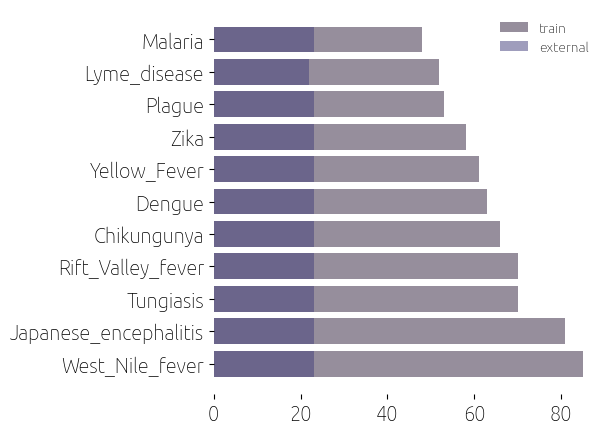

In [83]:
fig = plt.figure()
plt.barh(y = train_targets.index, width=train_targets.values, label = 'train', alpha = .5)
plt.barh(y = external_targets.index, width=external_targets.values, label = 'external', alpha = .5)
plt.box()
plt.legend()

In [91]:
# Flag data origin
train_data['external_data'] = 0
external_data['external_data'] = 1

In [92]:
sample_data

,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis
...,...,...
298,1005,Dengue Zika Japanese_encephalitis
299,1006,Dengue Zika Japanese_encephalitis
300,1007,Dengue Zika Japanese_encephalitis
301,1008,Dengue Zika Japanese_encephalitis


In [104]:
train_data.drop(['id'], axis = 1, inplace = True)
train_data.duplicated().value_counts()

False    707
dtype: int64

Apparently, no duplicates. 

In [94]:
external_data.duplicated().value_counts()

False    252
dtype: int64

In [95]:
train_extended = pd.concat([train_data.drop(['id'], axis = 1), external_data])
train_extended.duplicated().value_counts()

False    959
dtype: int64

So, even if we merge the training data w/ the external one, there shouldn't be any duplicates.

In [106]:
# Missing values
train_extended.isna().value_counts()

sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  vomiting  rash   diarrhea  hypotension  pleural_effusion  ascites  gastro_bleeding  swelling  nausea  chills  myalgia  digestion_trouble  fatigue  skin_lesions  stomach_pain  orbital_pain  neck_pain  weakness  back_pain  weight_loss  gum_bleed  jaundice  coma   diziness  inflammation  red_eyes  loss_of_appetite  urination_loss  slow_heart_rate  abdominal_pain  light_sensitivity  yellow_skin  yellow_eyes  facial_distortion  microcephaly  rigor  bitter_tongue  convulsion  anemia  cocacola_urine  hypoglycemia  prostraction  hyperpyrexia  stiff_neck  irritability  confusion  tremor  paralysis  lymph_swells  breathing_restriction  toe_inflammation  finger_inflammation  lips_irritation  itchiness  ulcers  toenail_loss  speech_problem  bullseye_rash  prognosis  external_data
False         False     False        False       False        False       False     False  False     False        False             False    False 

In [100]:
# Binary columns count
(train_extended.nunique() == 2).value_counts()

True     65
False     1
dtype: int64

In [101]:
train_extended.prognosis.unique()

array(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'], dtype=object)

In [125]:
train_ext_differences = (train_data.drop([TARGET, 'external_data'], axis = 1).apply(pd.Series.value_counts) / train_data.__len__()).diff().loc[1] \
 - (external_data.drop([TARGET, 'external_data'], axis = 1).apply(pd.Series.value_counts) / external_data.__len__()).diff().loc[1]
# external_data.drop([TARGET], axis = 1).apply(pd.Series.value_counts) / external_data.__len__()

In [134]:
train_ext_differences = train_ext_differences.sort_values(ascending=False)

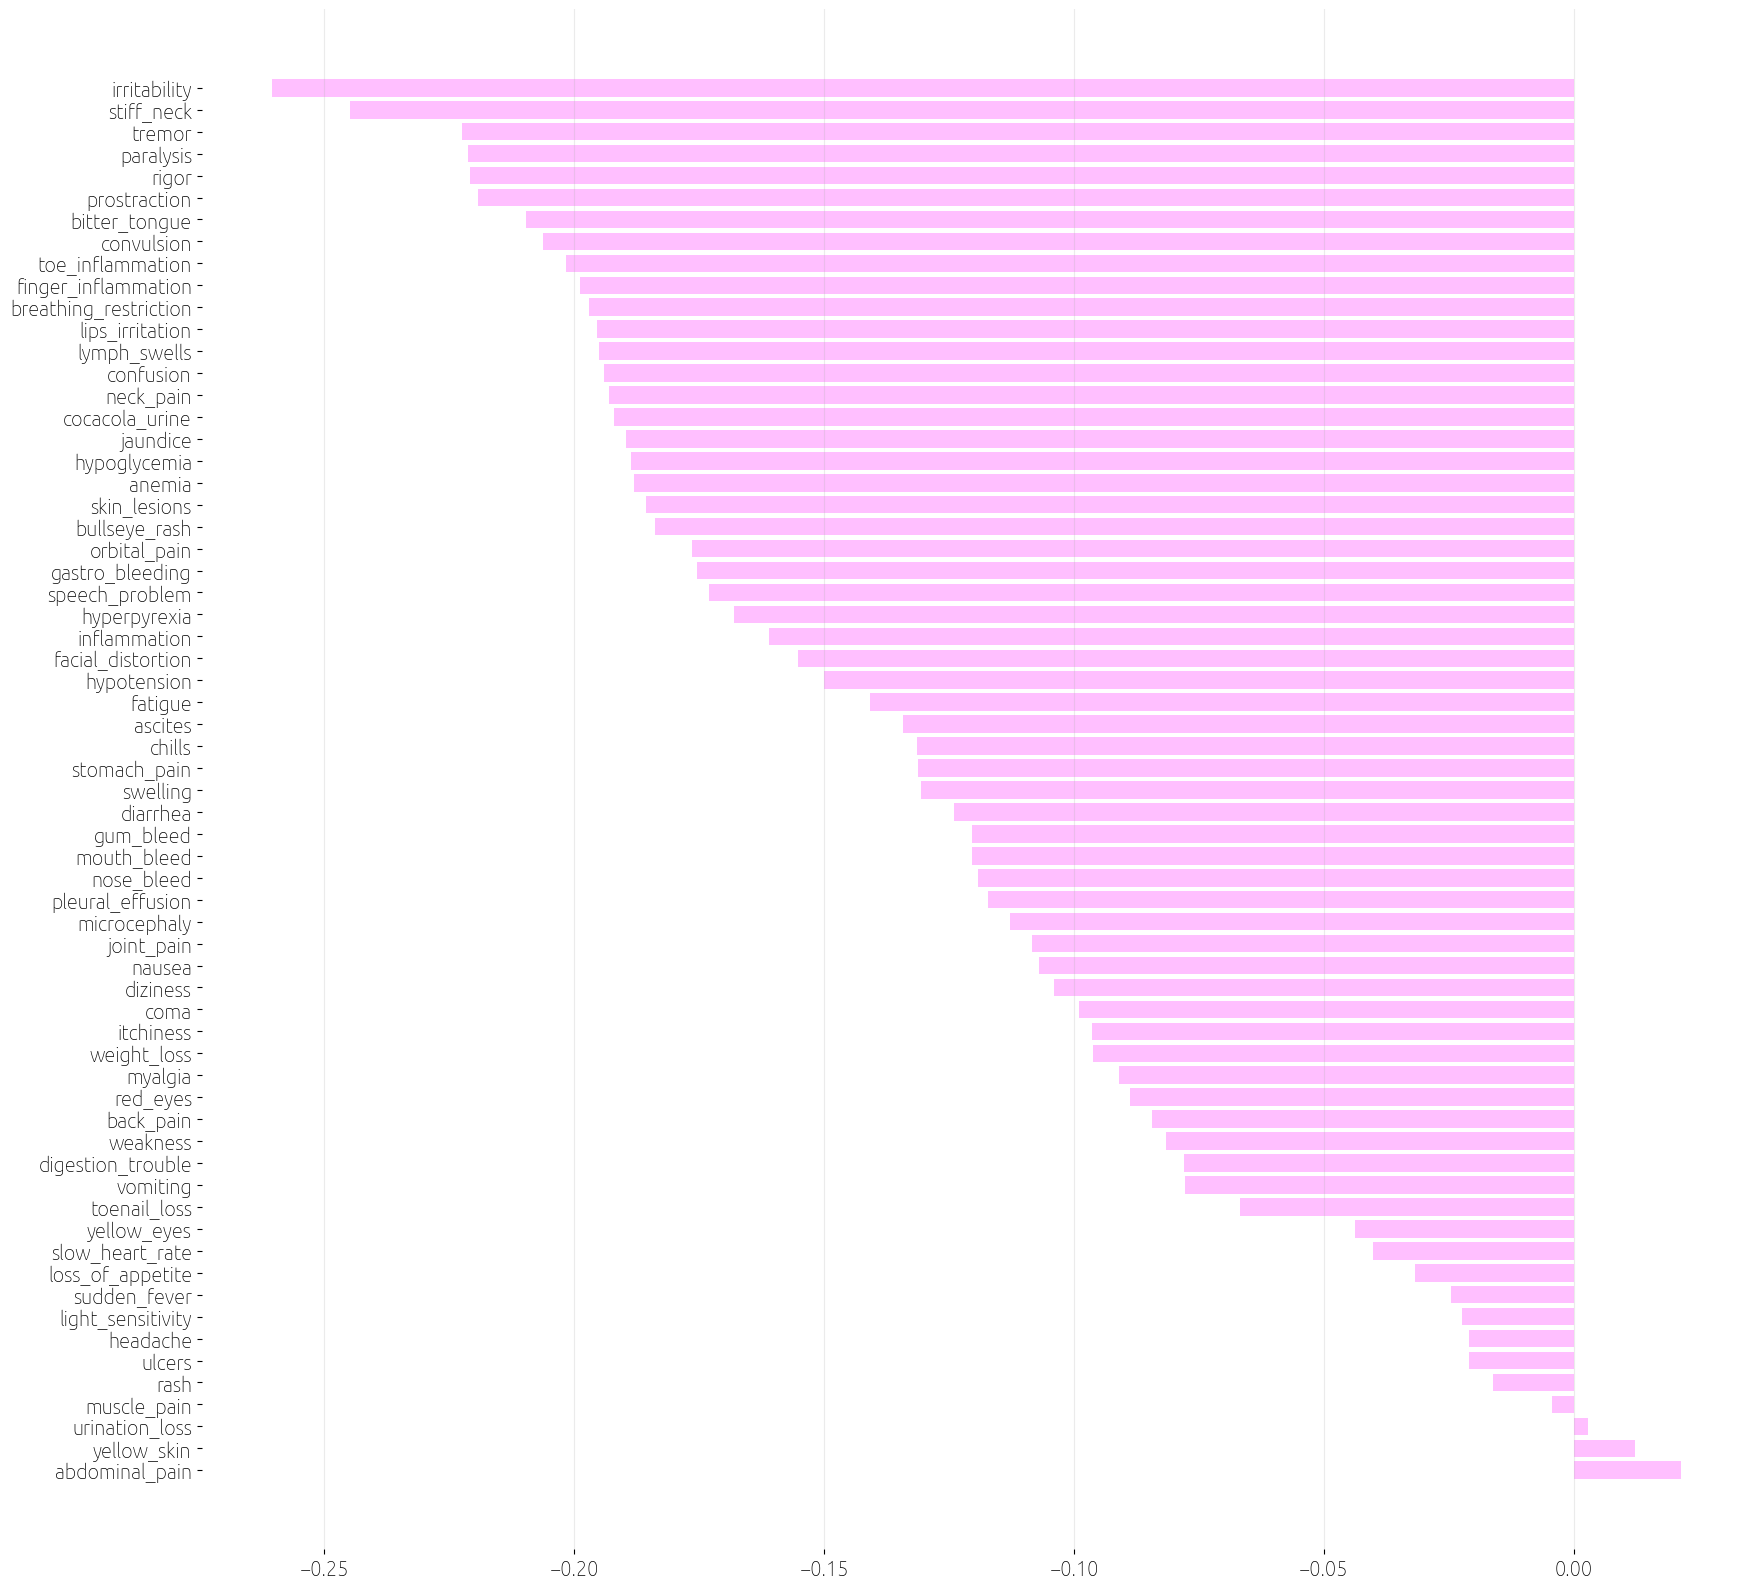

In [145]:
fig = plt.figure(figsize=(20,20))
plt.barh(y = train_ext_differences.index, width = train_ext_differences.values, color ='magenta', alpha = .25)
plt.grid(.99, axis = 'x')
plt.box()